In [20]:
import numpy as np 
import pandas as pd 
 
# Set seed for reproducibility 
np.random.seed(42) 
 
# Generate synthetic data for control and test groups 
n_control, n_test = 5000, 5000 
data = pd.DataFrame({ 
    "group": ["control"] * n_control + ["test"] * n_test, 
    "loan_uptake": np.random.binomial(1, 0.05, n_control).tolist() +  
                   np.random.binomial(1, 0.055, n_test).tolist(),  # Slight uplift in test 
    "loan_value": np.random.normal(500, 50, n_control).tolist() +  
                  np.random.normal(510, 50, n_test).tolist()  # Slightly higher avg in test 
}) 


In [22]:
data.head()

,group,loan_uptake,loan_value
0,control,0,425.606915
1,control,1,443.740695
2,control,0,519.440946
3,control,0,441.306334
4,control,0,555.631715


In [25]:
from statsmodels.stats.power import TTestIndPower 
 
# Parameters 
effect_size = 0.1 / 0.05  # Expected uplift / baseline rate 
alpha = 0.05 
power = 0.80 
 
# Sample size calculation 
analysis = TTestIndPower() 
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power) 
print(f"Required sample size per group: {sample_size:.0f}") 


Required sample size per group: 5


In [26]:
from scipy.stats import ttest_ind, chi2_contingency 
 
# t-Test for loan value 
control_values = data[data["group"] == "control"]["loan_value"] 
test_values = data[data["group"] == "test"]["loan_value"] 
t_stat, p_value = ttest_ind(control_values, test_values) 
print(f"t-Test for Loan Value: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}") 
 
# Chi-Square Test for loan uptake 
contingency_table = pd.crosstab(data["group"], data["loan_uptake"]) 
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table) 
print(f"Chi-Square Test for Loan Uptake: chi2-statistic = {chi2_stat:.3f}, p-value = {p_value:.3f}") 
 

t-Test for Loan Value: t-statistic = -11.469, p-value = 0.000
Chi-Square Test for Loan Uptake: chi2-statistic = 0.019, p-value = 0.891


In [31]:
import scipy.stats as stats 
 
# Observed data: [successes, failures] for control and test 
observed = [[50, 950],  # Control group: 50 successes, 950 failures 
            [80, 930]]  # Test group: 55 successes, 945 failures 
 
chi2, p_value, _, _ = stats.chi2_contingency(observed) 
print(f"Chi-Square Statistic: {chi2}, P-value: {p_value}")

Chi-Square Statistic: 6.6116644530553685, P-value: 0.010131292255561608


In [38]:
import scipy.stats as stats 
 
# Loan amounts for control and test groups 
control_loans = [500, 510, 495, 505, 490] 
test_loans = [910, 820, 600, 615, 500] 
 
# Perform independent t-test 
t_stat, p_value = stats.ttest_ind(control_loans, test_loans) 
print(f"T-Statistic: {t_stat}, P-value: {p_value}")

T-Statistic: -2.4884582322703364, P-value: 0.037612502477207176


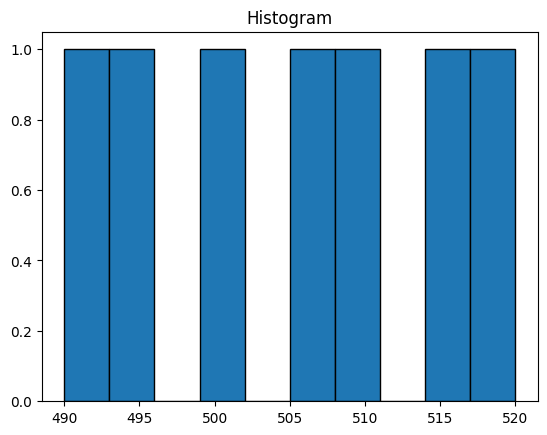

In [43]:
import matplotlib.pyplot as plt 
 
# Sample data 
data = [500, 510, 495, 505, 490, 515, 520] 
 
# Plot histogram 
plt.hist(data, bins=10, edgecolor='black') 
plt.title("Histogram") 
plt.show()

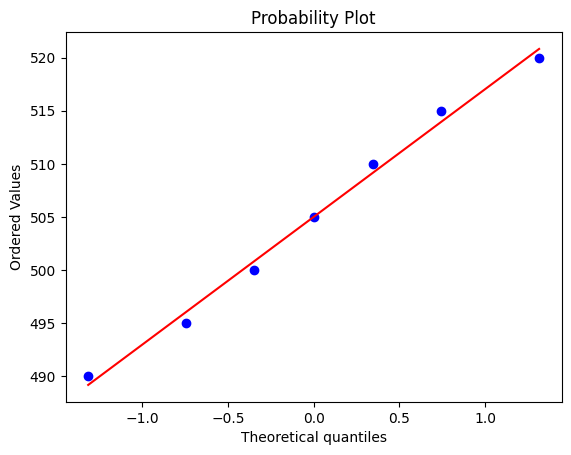

In [44]:
import scipy.stats as stats 
import matplotlib.pyplot as plt 
 
# Q-Q plot 
stats.probplot(data, dist="norm", plot=plt) 
plt.show()

In [45]:
from scipy.stats import skew, kurtosis 
 
data_skewness = skew(data) 
data_kurtosis = kurtosis(data, fisher=False)  # Use fisher=False for Pearson kurtosis 
print(f"Skewness: {data_skewness}, Kurtosis: {data_kurtosis}")

Skewness: 0.0, Kurtosis: 1.75


How to use Dictionary

In [1]:
input_str = "emfdpojewormldsmfeworewknoerjio3rjoemfoewrjewoprewofmpow"
input_dict = {}
for char in input_str:
    if char not in input_dict:
        input_dict[char] = 1
    else:
        input_dict[char] += 1
print(input_dict)    


{'e': 9, 'm': 5, 'f': 4, 'd': 2, 'p': 3, 'o': 10, 'j': 4, 'w': 7, 'r': 6, 'l': 1, 's': 1, 'k': 1, 'n': 1, 'i': 1, '3': 1}


In [6]:
for index, name in enumerate(input_dict, start=1):
    print(str(index)+' - '+name)

1 - e
2 - m
3 - f
4 - d
5 - p
6 - o
7 - j
8 - w
9 - r
10 - l
11 - s
12 - k
13 - n
14 - i
15 - 3


Numpy

In [2]:
import numpy as np

In [3]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [4]:
np.arange(0,20,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [5]:
np.linspace(0,20,5)

array([ 0.,  5., 10., 15., 20.])

In [6]:
np.linspace(0,10,10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [7]:
np.random.randint(5,50)

28

In [15]:
## Random see to output the same random vaues at all run time 
import random

random.seed(12)

random.randint(5,50)

35

In [16]:
array_2d = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [24]:
array_2d[0, :]

array([1, 2, 3])

In [1]:
import numpy as np
np.random.seed(0) # seed for reproducibility
x1 = np.random.randint(10, size=6) # One-dimensional array
x2 = np.random.randint(10, size=(3, 4)) # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5)) # Three-dimensional array

In [27]:
a=np.random.randn(1,10).reshape(5,2).transpose()

In [28]:
a[1]=5

In [29]:
a

array([[-0.87079715, -0.31155253, -1.16514984,  0.46566244,  1.48825219],
       [ 5.        ,  5.        ,  5.        ,  5.        ,  5.        ]])

In [26]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
s1 = 'I am a Canadian'

In [47]:
list1 = np.char.split(s1)

Pandas

In [63]:
import pandas as pd
import numpy as np

In [50]:
pd.__version__

'2.2.3'

In [51]:
lst = [1,2,3,4,5]
series = pd.Series(lst)

In [54]:
print(series)
print(type(series))

0    1
1    2
2    3
3    4
4    5
dtype: int64
<class 'pandas.core.series.Series'>


In [70]:
idx = len(np.arange(1,10, 2))
idx

5

In [137]:
a = np.random.random(3)
b = pd.Series(a, index = ['a', 'b', 'c'], name="test")
b

a    0.072434
b    0.019301
c    0.979573
Name: test, dtype: float64

In [139]:
b.name

'test'

In [115]:
dict_series = pd.Series({'p': [1,2,3], 'q': [4,5,6]})
m = dict_series['p'] + dict_series['q']
m

[1, 2, 3, 4, 5, 6]

In [110]:
#arr = np.random.randn(20).reshape(4,5)
arr = np.random.randint(20, size=(4,5))
arr

array([[19, 17,  7, 17, 14],
       [ 3, 10, 10,  1, 16],
       [10, 18, 16,  2,  6],
       [ 9,  2, 12,  9,  4]])

In [120]:
arr[1]%arr[2]

array([ 3, 10, 10,  1,  4])

Pandas DataFrame

In [356]:
#df = pd.DataFrame(lst)
a = [{'a': 5, 'b': 6, 'c': 12},
      {'a': 54, 'b': 3, 'c': 1}]
df = pd.DataFrame(a)
df['d'] = [6,34]
print(df.shape[0])
print(df.shape[1])

2
4


In [136]:
df['a']*df['c']

0    60
1    54
dtype: int64

In [145]:
df=pd.DataFrame({'test': lst}, index=['a', 'b', 'c', 'd', 'e'])
df

,test
a,1
b,2
c,3
d,4
e,5


In [143]:
b

a    0.072434
b    0.019301
c    0.979573
Name: test, dtype: float64

In [144]:
df_series = pd.DataFrame(b)
df_series

,test
a,0.072434
b,0.019301
c,0.979573


Key Differences Between Using a List vs. a Series in a DataFrame
Feature	        List	                    Pandas Series
Type	        Basic Python List	        Pandas Series Object
Column Name	    Needs to be explicitly set	Automatically becomes the column name in DataFrame
Index Handling	Uses default integer index	Uses the index from Series
Data Types	    Mixed types allowed	        Maintains a consistent dtype
Operations	    Limited for lists	        Supports vectorized operations (e.g., .mean(), .sum())

In [247]:
df_actual = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D', 'E'],
    "Actual": pd.Series([100, 200, 300, 400, 500], name = 'Actual_Sales'),
#    "Actual": [100, 200, 300, , 500],
    "Price": [12,45,66,54,68]
    }
, index = [1,2,3,4,5]
)
#df_actual.isnull()
#df_actual.isnull().sum()
#df_actual.isnull().sum().sum()
df_actual_no_null = df_actual.dropna(inplace=False)
print(df_actual_no_null)
print(df_actual)
#df_actual_fill = df_actual.fillna({'Category': 'none', 'Actual': 123, 'Price': 100}, inplace=False)
#df_actual_fill = df_actual.fillna(method='ffill', inplace=False)
df_actual_fill = df_actual.fillna(method='bfill', inplace=False)
#df_actual_fill = df_actual.fillna(value=df_actual['Actual'].mean(), inplace=False)
print(df_actual_fill)
#df_replaced = df_actual_fill.replace(to_replace=[45,66], value=[999,888], inplace=False)
#df_replaced = df_actual_fill.replace('[A-Za-z]', 0, regex = True, inplace=False)
df_replaced = df_actual_fill.replace(to_replace=400, method='bfill', inplace=False)
print(df_replaced)
print(type(df_replaced))

  Category  Actual  Price
1        A   200.0     12
2        B   300.0     45
3        C   400.0     66
4        D   500.0     54
  Category  Actual  Price
1        A   200.0     12
2        B   300.0     45
3        C   400.0     66
4        D   500.0     54
5        E     NaN     68
  Category  Actual  Price
1        A   200.0     12
2        B   300.0     45
3        C   400.0     66
4        D   500.0     54
5        E     NaN     68
  Category  Actual  Price
1        A   200.0     12
2        B   300.0     45
3        C   500.0     66
4        D   500.0     54
5        E     NaN     68
<class 'pandas.core.frame.DataFrame'>


C:\Users\micha\AppData\Local\Temp\ipykernel_23616\3967346632.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_actual_fill = df_actual.fillna(method='bfill', inplace=False)
C:\Users\micha\AppData\Local\Temp\ipykernel_23616\3967346632.py:22: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df_replaced = df_actual_fill.replace(to_replace=400, method='bfill', inplace=False)


In [173]:
df_planned = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    "Planned": pd.Series([400, 500, 600, 700], name = 'PLanned_Sales')
}
, index = [1,2,3,4]
)
df_planned

,Category,Planned
1,A,500.0
2,B,600.0
3,C,700.0
4,D,NaN


loc: Reference to the 'index' column. iloc: Reference to the underlining index starting from 0 and increasing by 1.

In [277]:
df_new = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    "New": [400, 500, 600, 700],
}
, index = pd.Series(['a', 'b', 'c', 'd'])
)
print(df_new)
print(df_new.loc['b':'d', 'New'])
print(df_new.iloc[[1,2]])
print(df_new.iloc[1:3,1])

  Category  New
a        A  400
b        B  500
c        C  600
d        D  700
b    500
c    600
d    700
Name: New, dtype: int64
  Category  New
b        B  500
c        C  600
b    500
c    600
Name: New, dtype: int64


In [161]:
df_combined = df_actual.merge(df_planned, on = 'Category')
df_combined

,Category,Actual,Planned
0,A,100,400
1,B,200,500
2,C,300,600


In [285]:
df_car = pd.read_csv('dataset_21_car.csv'
                     , index_col=['doors']
)
df_car.head(5)
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1728 entries, 2 to 5more
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   persons   1728 non-null   object
 3   lug_boot  1728 non-null   object
 4   safety    1728 non-null   object
 5   class     1728 non-null   object
dtypes: object(6)
memory usage: 94.5+ KB


In [263]:
df_car.loc[['2', '5more']]

,buying,maint,persons,lug_boot,safety,class
doors,,,,,,
2,vhigh,vhigh,2,small,low,unacc
2,vhigh,vhigh,2,small,med,unacc
2,vhigh,vhigh,2,small,high,unacc
2,vhigh,vhigh,2,med,low,unacc
2,vhigh,vhigh,2,med,med,unacc
...,...,...,...,...,...,...
5more,low,low,more,med,med,good
5more,low,low,more,med,high,vgood
5more,low,low,more,big,low,unacc


In [273]:
df_car.loc[df_car['safety'] == 'low', ['buying', 'class']]

,buying,class
doors,,
2,vhigh,unacc
2,vhigh,unacc
2,vhigh,unacc
2,vhigh,unacc
2,vhigh,unacc
...,...,...
5more,low,unacc
5more,low,unacc
5more,low,unacc


In [286]:
df_car_grp = df_car.groupby(by = ['persons', 'safety'])
#print(df_car_grp.groups['high'])
print(df_car_grp.groups)

{('2', 'high'): ['2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '2', '2', '3', ...], ('2', 'low'): ['2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5more', '5more', '5more', '2', '

In [287]:
for group, data_frame in df_car_grp.groups:
    print(group)
    print(data_frame)

2
high
2
low
2
med
4
high
4
low
4
med
more
high
more
low
more
med


In [189]:
type(df_car)
df_car.columns
df_car.shape
df_car.size
df_car.describe()
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [337]:
df_elec = pd.read_csv(r'electricity-normalized.csv')
df_elec.head(5)
#df_elec.describe()
#df_elec.shape
#df_elec.info()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [363]:
#df_elec_pivot = pd.pivot_table(df_elec, index='period', aggfunc='count')
#print(df_elec_pivot)
df_elec_pivot = pd.pivot_table(df_elec, index='period', aggfunc='max')
print(df_elec_pivot)

         class  date  day  nswdemand  nswprice  transfer  vicdemand  vicprice
period                                                                       
0.000000    UP   1.0    7   0.632550  0.319022  0.896053   0.544795  0.014586
0.021277    UP   1.0    7   0.612467  0.147952  0.893860   0.523563  0.009863
0.042553    UP   1.0    7   0.577507  0.286448  0.843421   0.578975  0.018625
0.063830    UP   1.0    7   0.526034  0.159932  0.841667   0.562662  0.010434
0.085106    UP   1.0    7   0.473073  0.163204  0.902632   0.529001  0.010590
0.106383    UP   1.0    7   0.416691  0.144140  0.902632   0.494045  0.009483
0.127660    UP   1.0    7   0.363880  0.098415  0.902632   0.466080  0.006072
0.148936    UP   1.0    7   0.328622  0.081122  0.902632   0.443035  0.004967
0.170213    UP   1.0    7   0.308688  0.087366  0.903070   0.423874  0.004715
0.191489    UP   1.0    7   0.301398  0.102138  0.927632   0.422915  0.005091
0.212766    UP   1.0    7   0.357929  0.118140  0.928070   0.425

In [368]:
df_elec_part = df_elec_pivot[df_elec_pivot['nswdemand']>=0.5].sort_values('nswdemand', ascending=False)[['class', 'day', 'nswdemand', 'nswprice']]
print(df_elec_part)

         class  day  nswdemand  nswprice
period                                  
0.744681    UP    7   1.000000  0.979975
0.765957    UP    7   0.980809  0.648673
0.723404    UP    7   0.953585  0.731716
0.787234    UP    7   0.945106  0.587847
0.808511    UP    7   0.905683  0.382311
0.702128    UP    7   0.885302  1.000000
0.829787    UP    7   0.871318  0.234448
0.382979    UP    7   0.856888  0.753993
0.404255    UP    7   0.846921  0.603128
0.851064    UP    7   0.844243  0.224481
0.425532    UP    7   0.829664  0.852738
0.638298    UP    7   0.822969  0.981806
0.872340    UP    7   0.822969  0.444037
0.659574    UP    7   0.821779  0.939204
0.531915    UP    7   0.819994  0.966074
0.553191    UP    7   0.815829  0.970908
0.361702    UP    7   0.814936  0.782875
0.617021    UP    7   0.813597  0.981806
0.510638    UP    7   0.811812  0.943137
0.595745    UP    7   0.810622  0.968296
0.446809    UP    7   0.809878  0.870181
0.574468    UP    7   0.809432  0.939204
0.340426    UP  

Merge

In [322]:
df1 = pd.DataFrame({'Roll No.': [1,2,3,4,5], 'Physics': [34,67,34,89,12], 'Branch-Phy': ['CS', 'EE', 'ICV', 'BIO', 'CS']})
print(df1)

   Roll No.  Physics Branch-Phy
0         1       34         CS
1         2       67         EE
2         3       34        ICV
3         4       89        BIO
4         5       12         CS


In [323]:
#df2 = pd.DataFrame({'Roll No.': [1,2,6,9,10], 'Chemistry': [78,33,39,81,90]})
df2 = pd.DataFrame({'Roll No.': [1,2,3,4,5], 'Chemistry': [78,33,39,81,90], 'Branch-Che': ['CH', 'EE', 'BIO', 'BIO', 'CS']})
print(df2)

   Roll No.  Chemistry Branch-Che
0         1         78         CH
1         2         33         EE
2         3         39        BIO
3         4         81        BIO
4         5         90         CS


In [324]:
#df_merged = df1.merge(df2, on='Roll No.')
df_merged = pd.merge(df1, df2, on='Roll No.')
#df_merged = pd.merge(df1, df2, how='left')
print(df_merged)
#df_outer = pd.merge(df1, df2, how='outer')
#print(df_outer)

   Roll No.  Physics Branch-Phy  Chemistry Branch-Che
0         1       34         CS         78         CH
1         2       67         EE         33         EE
2         3       34        ICV         39        BIO
3         4       89        BIO         81        BIO
4         5       12         CS         90         CS


In [302]:
df3 = pd.DataFrame({'Roll No.': [11,12,13,14,15], 'Physics': [34,67,34,89,12]})
print(df3)

   Roll No.  Physics
0        11       34
1        12       67
2        13       34
3        14       89
4        15       12


In [335]:
df_pivot = pd.pivot_table(df1, index='Branch-Phy', aggfunc='count')
print(df_pivot)
df_pivot = pd.pivot_table(df1, index='Branch-Phy', aggfunc='max')
print(df_pivot)
#df_pivot.loc['CS']
df_pivot.loc[df_pivot['Physics']>50]

            Physics  Roll No.
Branch-Phy                   
BIO               1         1
CS                2         2
EE                1         1
ICV               1         1
            Physics  Roll No.
Branch-Phy                   
BIO              89         4
CS               34         5
EE               67         2
ICV              34         3


,Physics,Roll No.
Branch-Phy,,
BIO,89,4
EE,67,2


Leetcode: Introduction to Pandas

1. Create a DataFrame from a List:
    df = pd.DataFrame(
        student_data, columns = ['student_id', 'age']
    )

2. Get the size of a DataFrame
return [players.shape[0], players.shape[1]]

3. Display first 3 rows
return(employees[:3])

4. Select data
df = students.loc[students['student_id'] == 101, ['name', 'age']]

5. Add a column
employees['bonus'] = employees['salary'] * 2

6. Remove duplicates based on 'email' column, keep first
return customers.drop_duplicates(subset=['email'], keep='first')

7. Drop rows with missing values on 'name' column
return students.dropna(subset='name')

8. Double the value of a column
    employees['salary'] = employees['salary'] * 2
    return employees

9. Rename columns
    return students.rename(columns =
    {
        'id': 'student_id',
        'first': 'first_name',
        'last': 'last_name',
        'age': 'age_in_years'
    })
Another solution:
#    df = pd.DataFrame(
#        {
#        'student_id': students['id'], 
#        'first_name': students['first'],
#        'last_name': students['last'],
#        'age_in_years': students['age']
#        }
#    )
#    return df

10. Change type
return students.astype({'grade': int})

11. Fill missing value
return products.fillna({'quantity': 0})

12. Concatenate two DataFrames
return pd.concat([df1, df2], axis=0)

13. Pivot table
    df_pivot = pd.pivot_table(weather, 
    index = 'month', columns = 'city', values = 'temperature')
    return df_pivot

14. Unpivot a table (melt)
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are "unpivoted" to the row axis, leaving just two non-identifier columns, 'variable' and 'value'.

Input:
+-------------+-----------+-----------+-----------+-----------+
| product     | quarter_1 | quarter_2 | quarter_3 | quarter_4 |
+-------------+-----------+-----------+-----------+-----------+
| Umbrella    | 417       | 224       | 379       | 611       |
| SleepingBag | 800       | 936       | 93        | 875       |
+-------------+-----------+-----------+-----------+-----------+
Output:
+-------------+-----------+-------+
| product     | quarter   | sales |
+-------------+-----------+-------+
| Umbrella    | quarter_1 | 417   |
| SleepingBag | quarter_1 | 800   |
| Umbrella    | quarter_2 | 224   |
| SleepingBag | quarter_2 | 936   |
| Umbrella    | quarter_3 | 379   |
| SleepingBag | quarter_3 | 93    |
| Umbrella    | quarter_4 | 611   |
| SleepingBag | quarter_4 | 875   |
+-------------+-----------+-------+

    df_melt = pd.melt(report, 
    id_vars = ['product'],
    var_name = 'quarter',
    value_vars = report.columns[1:],
    value_name = 'sales'
    )
    return df_melt

15. Select and sort
 df = animals[animals['weight']>100].sort_values('weight', ascending=False)[['name']]
    return df

Leetcode: 30 Days of Pandas

1. Select
df = world[(world['population'] >= 25000000) | (world['area'] >= 3000000)][['name', 'population', 'area']]
eturn df

    df = products[(products['low_fats'] == 'Y') & (products['recyclable'] == 'Y')][['product_id']] 
    return df  

2. Select: Not in another table (DataFrame), and rename column
    df = customers[~customers['id'].isin(orders['customerId'])][['name']]
    df = df.rename(columns={'name': 'Customers'})
    return df

3. Select, sort, drop, rename
    df = views[views['author_id'] == views['viewer_id']].sort_values(by=['author_id'], ascending=[True])[['author_id']]
    df = df.drop_duplicates(subset='author_id', keep='first')
    #df = df.rename(columns={'author_id': 'id'})
    df.columns = ['id']
    return df

4. Check string length
    df = tweets[tweets['content'].str.len() > 15][['tweet_id']]
    return df

5. IF/THEN condition, check string startswith, sort
    employees['bonus'] = np.where((employees['employee_id']%2 == 1) & (~employees['name'].str.startswith('M')), employees['salary'], 0)
    df = employees[['employee_id', 'bonus']].sort_values(by=['employee_id'], ascending=[True])    
    return df

6. Upper, lower case
    .str.upper(), .str.lower(), .str.isupper() or .str.islower()
    users['name'] = users['name'].str.capitalize()
    users = users.sort_values(by=['user_id'], ascending=[True])
    return users

7. Regex pattern and str.match
    email_rgx = r'^[A-Za-z][A-Za-z0-9_.-]*@leetcode\.com$'
    users['valid_email'] = users['mail'].str.match(email_rgx)
    df = users[users['valid_email'] == True][['user_id', 'name', 'mail']]
    return df

    diab1_pattern = r'^DIAB1'
    patients['diab1_ind'] = (patients['conditions'].str.contains(' DIAB1'))|(patients['conditions'].str.match(diab1_pattern))
    df = patients[patients['diab1_ind'] == True][['patient_id', 'patient_name', 'conditions']]
    return df   

    

In [357]:
df1

,Roll No.,Physics,Branch-Phy
0,1,34,CS
1,2,67,EE
2,3,34,ICV
3,4,89,BIO
4,5,12,CS


In [384]:
#df1['Branch-Phy'].str.lower()
#df1['Branch-Phy'].str[0].upper()
df1['Branch-Phy'].str.

pandas.core.series.Series